# BurstData class to pre-process data before fitting 

In [11]:
from burstfit.data import BurstData
from burstfit.utils.plotter import plot_me
%matplotlib inline

In [12]:
import logging
logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)

## Loading the data 

In [13]:
import tempfile
from urllib.request import urlretrieve

In [14]:
temp_dir = tempfile.TemporaryDirectory()
download_path = str(temp_dir.name) + "/FRB180417.fil"
url = "https://zenodo.org/record/3905426/files/FRB180417.fil"
urlretrieve(
    url, download_path,
)
fil_file = download_path

## BurstData class

`BurstData` class can be used to read the relevant candidate data from the file. 

Here we need some basic information about the candidate:
* file
* dm
* tcand (sec)
* width (samples) 
* SNR

In [15]:
bd = BurstData(
    fp=fil_file,
    dm=475.28400,
    tcand=2.0288800,
    width=2,
    snr=16.8128,
)

The following statement crops the relevant data around the candidate, normalizes it, dedisperses it at the candidate DM and applies RFI mask (if any).

In [16]:
bd.prepare_data()

2021-10-06 23:53:19,102 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-10-06 23:53:19,112 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2021-10-06 23:53:19,113 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-10-06 23:53:19,118 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (127.98158986433457, 18.365628141947383)


Using <class 'str'>:
/tmp/tmp0ahadjg0/FRB180417.fil

Data after cropping and pre-processing

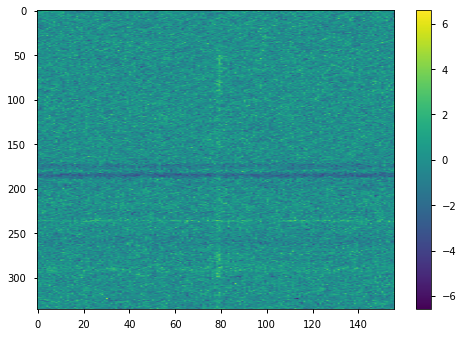

In [17]:
plot_me(bd.sgram)

## RFI Mitigation
Can set RFI mitigation parameters here. We can do RFI mitigation using savgol and spectral kurtosis filters.

In [18]:
bd = BurstData(
    fp=fil_file,
    dm=475.28400,
    tcand=2.0288800,
    width=2,
    snr=16.8128,
    spectral_kurtosis_sigma=4, 
    savgol_frequency_window=15, 
    savgol_sigma=4, 
    flag_rfi=True)

We can also change the size of cropped data to use for fitting. Let's give an input time window size of 0.3s.

2021-10-06 23:53:19,537 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
2021-10-06 23:53:19,560 - savgol_filter -your.utils.rfi - WARNING - Window size is less than 41 channels. Setting it to 41 channels.
2021-10-06 23:53:19,566 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.3s.
2021-10-06 23:53:19,567 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-10-06 23:53:19,569 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (128.66163654710576, 18.13507060467449)


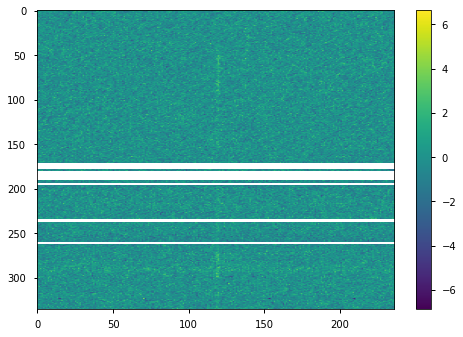

In [19]:
bd.prepare_data(time_window=0.3)
plot_me(bd.sgram)

White rows represent the frequency channels that have been flagged by the RFI mitigation algorithms 

We can even give channels to mask as input. Let's mask all channels from 50 to 60 and mask channel number 100. 

That can be done by giving the channel range as a tuple and individual channel number in a list

2021-10-06 23:53:19,831 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
2021-10-06 23:53:19,854 - savgol_filter -your.utils.rfi - WARNING - Window size is less than 41 channels. Setting it to 41 channels.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
2021-10-06 23:53:19,860 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.3s.
2021-10-06 23:53:19,86

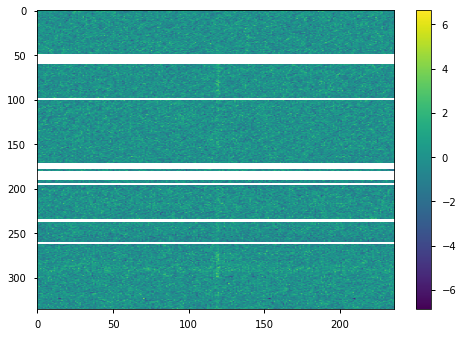

In [20]:
mask = [(50, 60), 100]
bd.prepare_data(time_window=0.3, mask_chans=mask)
plot_me(bd.sgram)

Looks good! 

Now the data is ready for burst fitting using `BurstFit`. 